In [2]:
# Titanic을 같이 만들어 보자!

import pandas as pd

# data loading (train data set)
train_df = pd.read_csv("./data/titanic/train.csv")
train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 차원을 확인!
# train_df.shape => (891, 12)
# train_df.info() # 각 column(feature)의 상세정보 출력
train_df.isnull().sum(axis=0)

# 결측치와 이상치를 찾아서 적절한 값으로 변경 or 삭제 처리


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
def stackedBarChart(feature):
    survived = train_df[train_df.Survived == 1][feature].value_counts()
    survived.name = "Survived"
    survived
    
    dead = train_df[train_df.Survived == 0][feature].value_counts()
    dead.name = "Dead"
    dead

    # 그래프를 그리기 위해 위에 만든 Series를 Df로 만들자
    chart_df = pd.DataFrame([survived,dead])
    chart_df.plot(kind="bar", stacked=True) 


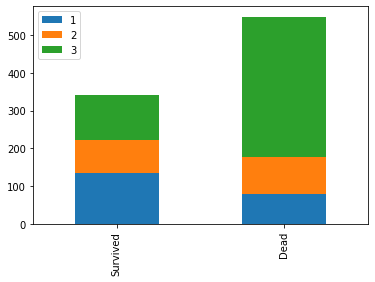

In [6]:
# 어떤 feature가 생존여부에 영향을 미치는지 확인
# 그래프로 확인!
# pychart나 누적바차트 많이 사용.
stackedBarChart("Pclass")

# 결과적으로 성별은 생존여부에 많은 영향을 준다.


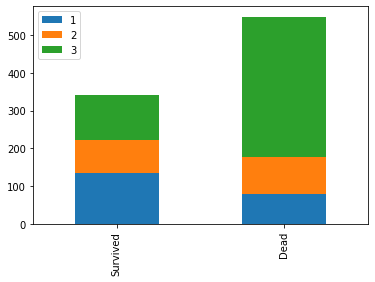

In [7]:
# Pclass가 생존여부에 영향을 미치는지 확인해 보자!
# 생존한 사람의 Pclass에 따른 사람수를 구해보자.
survived = train_df[train_df.Survived == 1].Pclass.value_counts()
survived.name = "Survived"
survived
# 사망한 사람의 Pclass에 따른 사람 수를 구해보자!
dead = train_df[train_df.Survived == 0].Pclass.value_counts()
dead.name = "Dead"
dead

# 그래프를 그리기 위해 위에 만든 Series를 Df로 만들자
pclass_df = pd.DataFrame([survived,dead])
pclass_df
pclass_df.plot(kind="bar", stacked=True) # 누적 바 차트

# 결과적으로 성별은 생존여부에 많은 영향을 준다.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


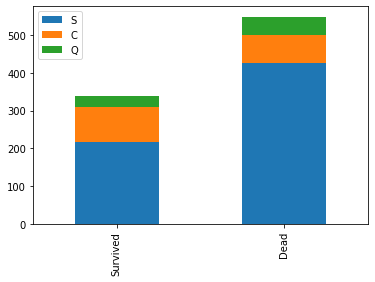

In [8]:
train_df.info()
stackedBarChart("Embarked")

In [9]:
# Feature engineeering
# Feature : column
train_df.head()
# text로 되어있는 부분은 machine learning하기 힘들다!
# text를 적절한 scale의 숫자로 변환
# NaN는 삭제보다 적절한 값으로 대체

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# 제일 먼저 해결해야 하는 feature는 Name (필요한 것만 뽑아내기)
# Name은 그 자체로 크게 의미가 없어 보이지만 이름의 특정 keyword가 들어있고
# 이 keyword가 생존에 영향을 미칠 수 있다.
train_df["Title"] = train_df.Name.str.extract("([A-Za-z]+)\.") # > ("정규식")
train_df["Title"].value_counts()

# Title 안에 Mr, Miss, Mrs, Others 를 각각 0,1,2,3 으로 변환
title_mapping_dict = { "Mr" : 0,
                         "Miss" : 1,
                             "Mrs" : 2,
                                 "Master" : 3, "Dr" : 3 , "Rev" : 3, "Col" : 3,
                                     "Major" : 3, "Mlle" : 3, "Don" : 3, "Jonkheer" : 3,
                                         "Countess" : 3, "Lady" : 3, "Mme" : 3, "Ms" : 3,
                                         "Sir" : 3, "Capt" : 3}

train_df["Title"] = train_df["Title"].map(title_mapping_dict)
# stackedBarChart("Title")
train_df.drop("Name", axis=1, inplace=True)
train_df.drop("Ticket", axis=1, inplace=True)
train_df.drop("Cabin", axis=1, inplace=True)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,3
887,888,1,1,female,19.0,0,0,30.0000,S,1
888,889,0,3,female,NaN,1,2,23.4500,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [11]:
# 성별 column에 대해  male => 0 , female => 1로 변환

sex_mapping_dict = { "male" : 0, "female" : 1 }
train_df["Sex"] = train_df["Sex"].map(sex_mapping_dict)
train_df



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,2
2,3,1,3,1,26.0,0,0,7.9250,S,1
3,4,1,1,1,35.0,1,0,53.1000,S,2
4,5,0,3,0,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S,3
887,888,1,1,1,19.0,0,0,30.0000,S,1
888,889,0,3,1,NaN,1,2,23.4500,S,1
889,890,1,1,0,26.0,0,0,30.0000,C,0


In [12]:
# NaN 처리 우선
train_df["Embarked"].fillna("S", inplace=True)

# 탑승지역 column에 대해  S => 0 , Q => 1 , C => 2로 변환
Emb_mapping_dict = { "S" : 0, "Q" : 1, "C" : 2 }
train_df["Embarked"] = train_df["Embarked"].map(Emb_mapping_dict)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,2,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,3
887,888,1,1,1,19.0,0,0,30.0000,0,1
888,889,0,3,1,NaN,1,2,23.4500,0,1
889,890,1,1,0,26.0,0,0,30.0000,2,0


In [13]:
# Age에는 결측치가 많다!
# 결측치를 대체해서 채워넣어야 한다.
# - 전체사람의 평균을 구해서 결측치를 채워야 한다.
# - title을 이용해서 각 title에 맞는 평균 나이로 결측치 채워보자.
# 직접 해보자
# train_df[train_df["Age"].isnull()].groupby("Title")
age_mean = train_df.groupby("Title")["Age"].mean()

#a = train_df[train_df["Title"]==0]
# values = train_df.groupby("Title")["Age"].mean()
# Age_map = { keys, values }
a = train_df[train_df["Title"]==0]["Age"].fillna(age_mean[0])
b = train_df[train_df["Title"]==1]["Age"].fillna(age_mean[1])
c = train_df[train_df["Title"]==2]["Age"].fillna(age_mean[2])
d = train_df[train_df["Title"]==3]["Age"].fillna(age_mean[3])

result = pd.concat([a,b,c,d])
result
result.sort_index()

train_df["Age"]= result.sort_index()
train_df["Age"].isnull().sum()


0

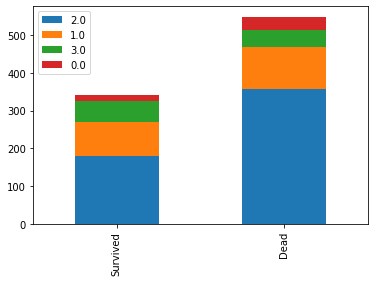

In [14]:
# Age에 대해서 Binning 처리
# Binning처리를 할 때 고려해야 할 사항 => 간격설정을 어떻게?
# Age : ~20 = 0
# Age : 21~40 = 1
# Age : 41~60 = 2
# Age : 61~ = 3


train_df.loc[train_df["Age"]<=16, "Age"] = 3
train_df.loc[(train_df["Age"]>16) & (train_df["Age"]<=34), "Age"] = 2
train_df.loc[(train_df["Age"]>34) & (train_df["Age"]<=53), "Age"] = 1
train_df.loc[train_df["Age"]>53, "Age"] = 0
stackedBarChart("Age")

In [15]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

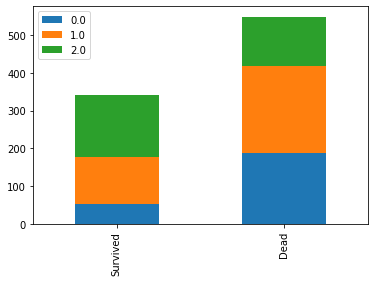

In [16]:
# Fare에 대한 Binning 처리

age_fare = train_df.groupby("Pclass")["Fare"].mean()
age_fare
#train_df.info()
train_df.loc[train_df["Fare"]<=8, "Fare"] = 0
train_df.loc[(train_df["Fare"]>8) & (train_df["Fare"]<=26), "Fare"] = 1
train_df.loc[train_df["Fare"]>26, "Fare"] = 2

stackedBarChart("Fare")



In [17]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,2.0,1,0,0.0,0,0
1,2,1,1,1,1.0,1,0,2.0,2,2
2,3,1,3,1,2.0,0,0,0.0,0,1
3,4,1,1,1,1.0,1,0,2.0,0,2
4,5,0,3,0,1.0,0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,1.0,0,3
887,888,1,1,1,2.0,0,0,2.0,0,1
888,889,0,3,1,2.0,1,2,1.0,0,1
889,890,1,1,0,2.0,0,0,2.0,2,0


In [18]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,-0.008904,-0.057527,-0.001652,-0.015846,-0.013128,-0.002555
Survived,-0.005007,1.000000,-0.338481,0.543351,0.028749,-0.035322,0.081629,0.275398,0.167675,0.445792
Pclass,-0.035144,-0.338481,1.000000,-0.131900,0.355783,0.083081,0.018443,-0.680340,-0.162098,-0.164205
Sex,-0.042939,0.543351,-0.131900,1.000000,0.031303,0.114631,0.245489,0.194360,0.108262,0.557890
Age,-0.008904,0.028749,0.355783,0.031303,1.000000,0.232078,0.133217,-0.131157,-0.027553,0.069970
SibSp,-0.057527,-0.035322,0.083081,0.114631,0.232078,1.000000,0.414838,0.327608,-0.068230,0.287060
Parch,-0.001652,0.081629,0.018443,0.245489,0.133217,0.414838,1.000000,0.353846,-0.039798,0.341660
Fare,-0.015846,0.275398,-0.680340,0.194360,-0.131157,0.327608,0.353846,1.000000,0.089852,0.318761
Embarked,-0.013128,0.167675,-0.162098,0.108262,-0.027553,-0.068230,-0.039798,0.089852,1.000000,0.069734
Title,-0.002555,0.445792,-0.164205,0.557890,0.069970,0.287060,0.341660,0.318761,0.069734,1.000000


In [19]:
# machine learning 해보자!
# Tensorflow를 이용해서 Logistic regression을 이용해서 구현해 보자.

import tensorflow as tf
import pandas as pd

# data set을 준비.
# 정확도 측정을 위한 학습용 데이터와 평가용 데이터를 따로 분리.
# train_df를 적절한 비율로 분리해서 학습용과 평가용데이터를 분리.
# - n fold cross validation (교차 검증)
# n의 갯수만큼 데이터를 분리 -> 각 1/n 씩 정확도를 평가해서 전체의 정확도를 평균화해서 값을 구하는 방법!

# 지금은 상위 80% => 학습용 데이터
# 하위 20% => 평가용 데이터

train_df.shape
train_num = int(train_df.shape[0] * 0.8)


# train data set

# train_x_data = train_df.drop("Survived", axis=1, inplace=False)[:train_num].values
# train_x_data
# test_x_data = train_df.drop("Survived", axis=1, inplace=False)[train_num:].values

train_x_data = train_df.iloc[:train_num,2:].values
test_x_data = train_df.iloc[train_num:,2:].values

train_y_data = train_df["Survived"][:train_num].values.reshape([-1,1])
test_y_data = train_df["Survived"][train_num:].values.reshape([-1,1])

# train_data, test_data Set up

# tensorflow를 이용한 logistic regression code가 나온다.
# placeholder

X = tf.placeholder(shape=[None,8], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([8,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# Cost(Loss) function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                             labels = Y))

# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1) # 경사하강법을 이용한 최적해 찾기
train = optimizer.minimize(cost)

# session 초기화

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습

for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict={ X : train_x_data,
                                                        Y : train_y_data})
    if step % 3000 == 0:
        print(f"Cost 값은 : {cost_val}")
        

    
# 우리가 원하는 W와 b를 구했다! => 모델을 구성했다!
# 정확도를 측정
# test용 입력데이터를 넣어서 예측
# 이렇게 구한 예측값과 y입력데이터를 비교
# 예측값과 실제데이터의 차이를 비율로 계산해 보자!

predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}".format(sess.run(accuracy, feed_dict={X:test_x_data,
                                                Y:test_y_data})))


# kaggle에서 제공한 test.csv파일을 이용해서 prediction 해야 한다!
# 예측결과가 나온다! => 파일로 만들어서 제출
# test.csv가 train.csv와 같아서 같은 형식으로 만들어서 예측을 진행해야 한다.

Cost 값은 : 3.2447030544281006
Cost 값은 : 0.43600180745124817
Cost 값은 : 0.43567752838134766
Cost 값은 : 0.4356113374233246
Cost 값은 : 0.43559783697128296
Cost 값은 : 0.4355950653553009
Cost 값은 : 0.43559443950653076
Cost 값은 : 0.4355943202972412
Cost 값은 : 0.4355942904949188
Cost 값은 : 0.435594379901886
정확도 : 0.8435754179954529


In [18]:
## test.csv 파일 가공

import pandas as pd

# data loading (test data set)
test_df = pd.read_csv("./data/titanic/test.csv")
test_df.head()
# test_df.info()
test_df.Name

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [19]:
# test data의 name 처리
test_df["Title"] = test_df.Name.str.extract("([A-Za-z]+)\.") # > ("정규식")
test_df["Title"].value_counts()

# Title 안에 Mr, Miss, Mrs, Others 를 각각 0,1,2,3 으로 변환
title_mapping_dict = { "Mr" : 0,
                         "Miss" : 1,
                             "Mrs" : 2,
                                 "Master" : 3, "Dr" : 3 , "Rev" : 3, "Col" : 3,
                                     "Major" : 3, "Mlle" : 3, "Dona" : 3, "Jonkheer" : 3,
                                         "Countess" : 3, "Lady" : 3, "Mme" : 3, "Ms" : 3,
                                         "Sir" : 3, "Capt" : 3}

test_df["Title"] = test_df["Title"].map(title_mapping_dict)
# stackedBarChart("Title")
test_df.drop("Name", axis=1, inplace=True)
test_df.drop("Ticket", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,2
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,0
414,1306,1,female,39.0,0,0,108.9000,C,3
415,1307,3,male,38.5,0,0,7.2500,S,0
416,1308,3,male,NaN,0,0,8.0500,S,0


In [20]:
sex_mapping_dict = { "male" : 0, "female" : 1}
test_df["Sex"] = test_df["Sex"].map(sex_mapping_dict)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,0
1,893,3,1,47.0,1,0,7.0000,S,2
2,894,2,0,62.0,0,0,9.6875,Q,0
3,895,3,0,27.0,0,0,8.6625,S,0
4,896,3,1,22.0,1,1,12.2875,S,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,S,0
414,1306,1,1,39.0,0,0,108.9000,C,3
415,1307,3,0,38.5,0,0,7.2500,S,0
416,1308,3,0,NaN,0,0,8.0500,S,0


In [21]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

In [22]:
# 나이 결측치!
age_mean = test_df.groupby("Title")["Age"].mean()

#a = train_df[train_df["Title"]==0]
# values = train_df.groupby("Title")["Age"].mean()
# Age_map = { keys, values }
a = test_df[test_df["Title"]==0]["Age"].fillna(age_mean[0])
b = test_df[test_df["Title"]==1]["Age"].fillna(age_mean[1])
c = test_df[test_df["Title"]==2]["Age"].fillna(age_mean[2])
d = test_df[test_df["Title"]==3]["Age"].fillna(age_mean[3])

result = pd.concat([a,b,c,d])
result
result.sort_index()

test_df["Age"]= result.sort_index()
test_df["Age"].isnull().sum()


0

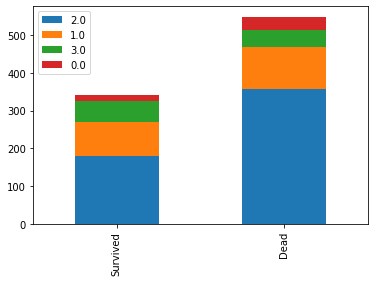

In [23]:
test_df.loc[test_df["Age"]<=16, "Age"] = 3
test_df.loc[(test_df["Age"]>16) & (test_df["Age"]<=34), "Age"] = 2
test_df.loc[(test_df["Age"]>34) & (test_df["Age"]<=53), "Age"] = 1
test_df.loc[test_df["Age"]>53, "Age"] = 0
stackedBarChart("Age")






In [24]:
# test_df["Fare"][152] = 0
# test_df["Fare"][152:]
test_df["Fare"].fillna(0,inplace=True)
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

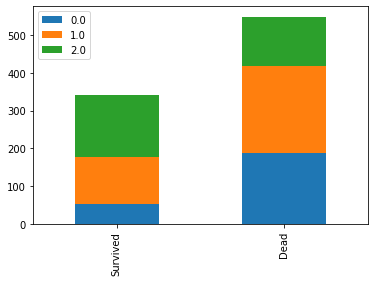

In [25]:
age_fare = test_df.groupby("Pclass")["Fare"].mean()
age_fare
#train_df.info()
test_df.loc[test_df["Fare"]<=8, "Fare"] = 0
test_df.loc[(test_df["Fare"]>8) & (test_df["Fare"]<=26), "Fare"] = 1
test_df.loc[test_df["Fare"]>26, "Fare"] = 2

stackedBarChart("Fare")




In [26]:
# 탑승지역 column에 대해  S => 0 , Q => 1 , C => 2로 변환
Emb_mapping_dict = { "S" : 0, "Q" : 1, "C" : 2 }
test_df["Embarked"] = test_df["Embarked"].map(Emb_mapping_dict)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,1.0,0,0,0.0,1,0
1,893,3,1,1.0,1,0,0.0,0,2
2,894,2,0,0.0,0,0,1.0,1,0
3,895,3,0,2.0,0,0,1.0,0,0
4,896,3,1,2.0,1,1,1.0,0,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,1.0,0,0
414,1306,1,1,1.0,0,0,2.0,2,3
415,1307,3,0,1.0,0,0,0.0,0,0
416,1308,3,0,2.0,0,0,1.0,0,0


In [27]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,1.0,0,0,0.0,1,0
1,893,3,1,1.0,1,0,0.0,0,2
2,894,2,0,0.0,0,0,1.0,1,0
3,895,3,0,2.0,0,0,1.0,0,0
4,896,3,1,2.0,1,1,1.0,0,2


In [28]:
# machine learning

tt_x_data = test_df.iloc[:,1:].values
#tt_y_data
tt_x_data

# 1과 0으로 만들어진 예측치
predict = tf.cast(H > 0.5, dtype=tf.float32)

print(f"정확도 : {sess.run(predict,feed_dict={X : tt_x_data})}")
               
               
result = pd.DataFrame(sess.run(predict,feed_dict={X : tt_x_data}))
display(result)
print(result.sum())

output_df = pd.read_csv("./data/titanic/gender_submission.csv")
# result.to_csv("./data/titanic/result.csv", header = True, index = False)
output_df["Survived"] = result
output_df = pd.DataFrame(output_df,dtype="int32") # int 로 안바꿔주면 score 안나온다!
output_df.to_csv("./data/titanic/put8_result.csv", index = False)
# output_df

정확도 : [[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
413,0.0
414,1.0
415,0.0
416,0.0


0    165.0
dtype: float32


In [29]:
train_df["Age"].describe()

count    891.000000
mean       1.772166
std        0.716381
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Age, dtype: float64

In [30]:
# train_df.loc[:train_num,["Pclass","Sex","Age","Fare","Embarked","Title"]]
train_x_data = train_df.drop(["Survived","SibSp","Parch"], axis=1, inplace=False)[:train_num]
# train_x_data = train_df.iloc[:train_num,2:]
train_x_data
# train_df.shape
# train_num = int(train_df.shape[0] * 0.8)
# train_num

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,1,3,0,2.0,0.0,0,0
1,2,1,1,1.0,2.0,2,2
2,3,3,1,2.0,0.0,0,1
3,4,1,1,1.0,2.0,0,2
4,5,3,0,1.0,1.0,0,0
...,...,...,...,...,...,...,...
707,708,1,0,1.0,2.0,0,0
708,709,1,1,2.0,2.0,0,1
709,710,3,0,2.0,1.0,2,3
710,711,1,1,2.0,2.0,2,3


In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

myModel = model.fit(train_x_data, train_y_data) # 학습끝

result = myModel.predict(test_x_data)
result

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: X has 8 features per sample; expecting 7

In [ ]:
train_df.iloc[:train_num,2:].values[1]